# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
2. [Data Loading and Description](#section3)
    - 3.1 [Importing the Dataset](#section301)<br/>
    - 3.2 [Describing the Dataset](#section302)<br/>
3. [Data Profiling](#section4)
    - 4.1 [Understanding the Dataset](#section401)<br/>
    - 4.2 [Pre Profiling](#section402)<br/>
    - 4.3 [Preprocessing](#section403)<br/>
    - 4.4 [Post Profiling](#section404)<br/>
4. [Questions](#section5)
    - 5.1 [How many patients survived and how many did not survive?](#section501)<br/>
    - 5.2 [What is the Age trend of patients against the survival status?](#section502)<br/>
    - 5.3 [Does the survival rate change depending on the Year of Operation?](#section503)<br/>
    - 5.4 [What is the survival rate considering the Pos_axillary_nodes?](#section504)<br/>
    - 5.5 [Survival rate - Comparing Age and Year of Operation.](#section505)<br/>
    - 5.6 [How is the survival rate considering the Age and the no.of Pos_axillary_nodes](#section506)<br/>
    - 5.7 [Does the survival rate change based on the Year of Operation and the Pos_axillary_nodes](#section507)<br/>
    - 5.8 [Draw pair plot to know the joint relationship between 'Age','Years Of Operation','Pos_axillary_nodes'.](#section508)
    - 5.9 [Hypothesis:Patients with 0 'Pos_axillary_nodes' are more likely to survive 5 years or more.](#section509)
    <br/>
    - 5.10 [Hypothesis:Patients of 'Age' 30 to 40 are more likely to survive 5 years or more.](#section510)
    <br/>
5. [Conclusions](#section6)<br/>  

<a id=section1></a>
## 1.Problem Statement

The Breast Cancer Survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.Based on the data we analyze the factors that have an impact on the survival chance of a patient who has undergone surgery for breast cancer.



<a id=section1></a>
## 2.Importing Packages

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

<a id=section3></a>
## 3.Data Loading and Description

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 


<a id=section301></a>
### 3.1 Importing the Dataset

In [2]:
breastcancer_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv")
breastcancer_data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id=section302></a>
### 3.2 Description of the Dataset

- The dataset comprises of __306 observations of 4 columns__. Below is a table showing names of all the columns and their description.


| Column Name            | Description                                                                                   |
| -------------          |:-------------                                                                                :| 
| Age	                 | Age of the patient at the time of Operation                                                   | 
| Years_of_operation     | Patient's Year of Operation                                                                   |  
| Pos_axillary_nodes     | Number of Positive axillary nodes detected                                                    | 
| Status                 | Whether the patient survived five years or longer.1 is survived and 2 did not survive         |   

<a id=section4></a>
## 4.Data Profiling

<a id=section401></a>
### 4.1 Understanding the Dataset

In [3]:
breastcancer_data.shape                    #This gives us the number of rows and columns of the dataframe

(306, 4)

- There are **306** rows and **4** columns in this dataset

In [4]:
breastcancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


- We could infer that all the columns are of the data type **int**
- There are no **missing or null** values in the data

In [5]:
breastcancer_data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


 ```describe``` function gives us the following insights into the data:
  
  - **Age** column is having a **normal distribution** because the **mean (52.457)** value is equal to the **median (52.000)** value.

  - The **Pos_axillary_nodes** column is **positive(right) skewed** since the **mean(4)** value lies to the right of the **median(1)**
  
  - The max value of **Pos_axillary_nodes(52)** is an **outlier** because it lie far away from the **mean(1)**.
 

<a id=section402></a>
### 4.2 Pre Profiling

In [6]:
profile = pandas_profiling.ProfileReport(breastcancer_data)
profile.to_file(output_file="breastcancer_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: **4**
- Number of observations: **306**
- Missing cells: **0(0.0%)**	


__Variables types__: 
- Numeric = **3**
- Categorical = **1**


-  There are 17 **duplicate rows** in this dataset<br>
-  **Pos_axillary_nodes** has **136(44.4%) zeros<br>
-  **Pos_axillary_nodes** has a **skewness** of **2.9838** and **kurtosis** of **11.7308**.<br>
  - The distribution is **positive (right) skewed** as the **mean (4.0261)** is to the **right** of the **median (1)**.
  - **95%** samples have a **Pos_axillary_nodes** less than **19.75**.
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data
- **Status** has data divided into **2** distinct categories.<br>  
  - **Value 1** has **225** count and **Value 2** has **81** count

<a id=section403></a>
###  4.3 Preprocessing

- Dealing with the duplicates<br>
   - Dropping the duplicate rows from the dataset

In [7]:
breastcancer_data.drop_duplicates(keep='first',inplace=True)
breastcancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 305
Data columns (total 4 columns):
Age                   289 non-null int64
Years_of_operation    289 non-null int64
Pos_axillary_nodes    289 non-null int64
Status                289 non-null int64
dtypes: int64(4)
memory usage: 11.3 KB


<a id=section404></a>
### 4.4 Post Pandas Profiling

In [8]:
profile = pandas_profiling.ProfileReport(breastcancer_data)
profile.to_file(output_file="breastcancer_after_preprocessing.html")

Now we have preprocessed the data, now the dataset does not contain duplicate values
- In the Dataset info, Total __Duplicate rows(%)__ = __0.0%__ 
- Number of __variables__ = __5__ 


<a id=section1></a>
## 5.Questions

 <a id=section501></a>
 ### 5.1 How many patients survived 5 years or more and how many did not survive

- Using CountPlot

Text(0.5, 1.0, 'Count plot for the survival status')

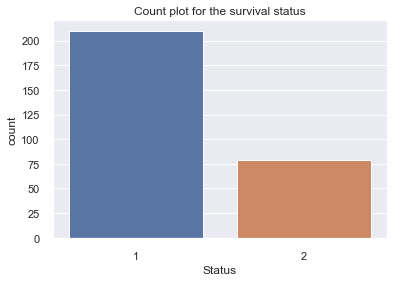

In [9]:
sns.countplot(x='Status',data=breastcancer_data).set_title('Count plot for the survival status')

- It is evident that the patients who survived are more than twice the number of patients who did not survive

- Using groupby to get the exact count

In [10]:
breastcancer_data.groupby(['Status'])['Status'].count()

Status
1    210
2     79
Name: Status, dtype: int64

- We could find that 210 patients survived and 79 patients did not survive

- Let us find the percentage of patients survived Vs the ones who did not survive

Text(0.5, 1.0, 'Pie chart to show the percentage of patients survived')

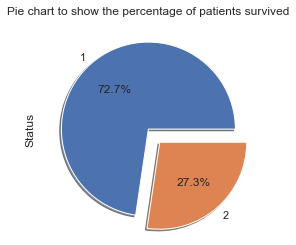

In [11]:
breastcancer_data['Status'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)
plt.title("Pie chart to show the percentage of patients survived")

- It is evident that **72.7%** patients have survived and **27.3%** of patients did not survive five years or longer
- The percentage of patients who survived are comparatively higher than the ones who did not survive

<a id=section502></a>
### 5.2 What is the Age trend of patients against the survival status?

- Using a facetgrid to check the Age distribution

Text(0.5, 1, 'Age distribution using FacetGrid')

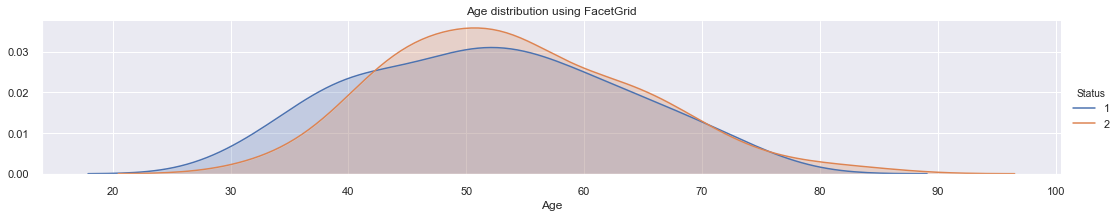

In [12]:
as_Fig=sns.FacetGrid(breastcancer_data,hue='Status',aspect=5)
as_Fig.map(sns.kdeplot,'Age',shade=True)
as_Fig.add_legend()
plt.title('Age distribution using FacetGrid')          

- Patients of age ranging from **30** to **40** have survival rate more than the death rate
- Patients of age ranging from **45** to **65** have death rate exceeding the survival rate

#### 5.2.1 Verifying the no of patients in each age bracket

Text(0, 0.5, 'No of Patients')

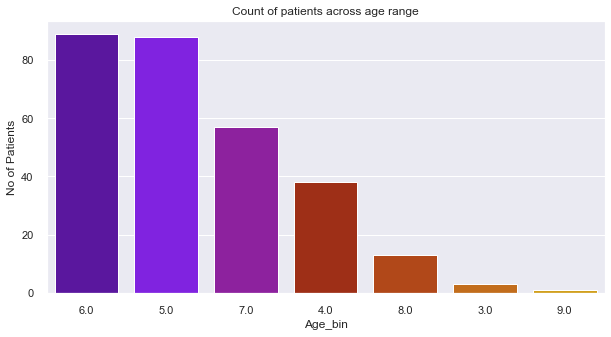

In [13]:
for i in range(10,0,-1):
        breastcancer_data.loc[ breastcancer_data['Age'] <= i*10, 'Age_bin'] = i
plt.figure(figsize=(10,5))
plt.title("Count of patients across age range")            
sns.countplot('Age_bin',data = breastcancer_data, order = breastcancer_data['Age_bin'].value_counts().index,palette="gnuplot")
plt.ylabel("No of Patients")

- There are more patients in the Age range **40** to **60** 

In [14]:
pd.crosstab([breastcancer_data.Age_bin], breastcancer_data.Status, margins=True).apply(lambda r: r*100/r.sum(), axis=1).style.background_gradient(cmap='autumn_r')


Status,1,2,All
Age_bin,,,
3.0,50,0,50
4.0,44.7368,5.26316,50
5.0,34.6591,15.3409,50
6.0,35.3933,14.6067,50
7.0,34.2105,15.7895,50
8.0,38.4615,11.5385,50
9.0,0,50,50
All,36.3322,13.6678,50


- **All** patients **survived** in the Age **30** but there were only **fewer** patients in this bin
- Patients Age ranging from **31** to **40** have high survival rate
- Surprisingly the trend changed for patients of Age **71** to **80** as they have better survival rate considering the fact that the number of patients in this bin is little above **10**
- There was only one patient with Age above **80** and he **not survive**
- The survival rate is almost equal for patients with Age from **41** to **70**

<a id=section303></a>
### 5.3 Does the survival rate change depending on the Year of Operation?

#### 5.3.1 Find the number of patients who got operated every year

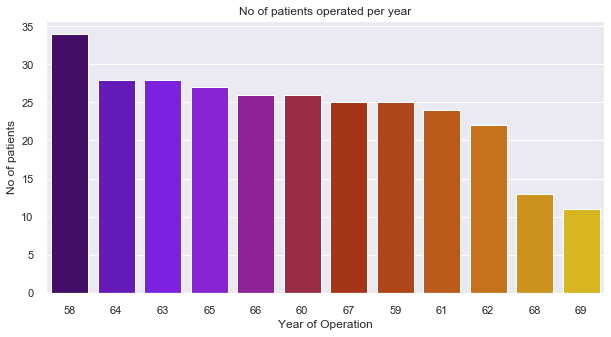

In [15]:
plt.figure(figsize=(10,5))
sns.countplot('Years_of_operation',data = breastcancer_data, order = breastcancer_data['Years_of_operation'].value_counts().index,palette="gnuplot")
plt.title("No of patients operated per year")
plt.ylabel("No of patients")
plt.xlabel("Year of Operation")
plt.show()

- More number of patients got operated in the Year **58** followed by **64** and **63**
- Less patients got operated in **69** followed by **68**

#### 5.3.2 Find the survival rate each year

Text(0.5, 1.0, 'Survived and not survived count each year')

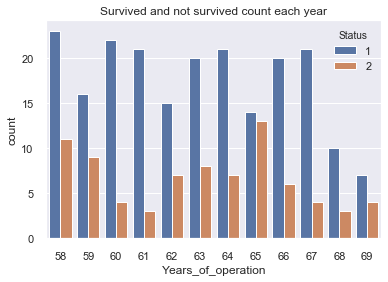

In [16]:
sns.countplot('Years_of_operation',data=breastcancer_data,hue='Status')
plt.title("Survived and not survived count each year")

- Maximum no of patients survived in the year **58** followed by **60** considering the total
- Year **61** and **60** saw more patients survive relatively **higher** than the ones that did not survive
- Less no of patients survived in the year **65** followed by **58** considering the total 
- Year **69** and **68** show relatively higher patients who did **not survive**

- Trying to figure out the max and the min survival rate across the years

In [17]:

pd.crosstab([breastcancer_data.Years_of_operation], breastcancer_data.Status, margins=True).apply(lambda r: r*100/r.sum(), axis=1).style.background_gradient(cmap='autumn_r')


Status,1,2,All
Years_of_operation,,,
58,33.8235,16.1765,50
59,32,18,50
60,42.3077,7.69231,50
61,43.75,6.25,50
62,34.0909,15.9091,50
63,35.7143,14.2857,50
64,37.5,12.5,50
65,25.9259,24.0741,50
66,38.4615,11.5385,50


- Rate of survival is high for **61** followed by **60** and **67**
- Rate of survival is low in the year **65** followed by **69**
  

<a id=section504></a>
## 5.4 What is the survival rate considering the Pos_axillary_nodes?

- Using facetgrid to verify the survival status against the Pos_axillary_nodes

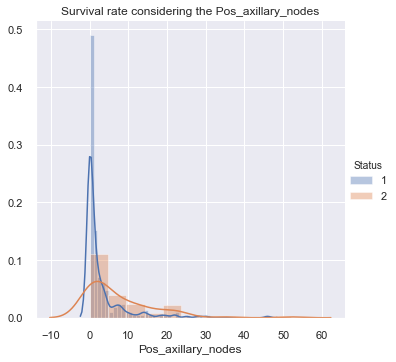

In [18]:
sns.FacetGrid(breastcancer_data,hue='Status',height = 5).map(sns.distplot,"Pos_axillary_nodes").add_legend();
plt.title("Survival rate considering the Pos_axillary_nodes")
plt.show()

- It is evident that patients with **no nodes** or **1 node** are more likely to survive 
- The survival chances are very less when there are **25** or **more nodes**

- Using a violin plot to verify the survival chances against the nodes

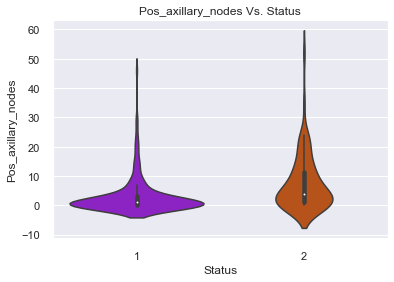

In [19]:
sns.violinplot(x="Status",y="Pos_axillary_nodes",palette="gnuplot",data = breastcancer_data)
plt.title("Pos_axillary_nodes Vs. Status")
plt.show()

- The survival chances are more for the patients with **0** or **1** nodes
- We could also find that a significant no of patients with **0** nodes have also died

#### Using a pie plot to check the survival percentage of patients with **0 and 1 node**

Text(0.5, 1.0, 'Pie plot showing the survival percentage of nodes 0,1 and 2')

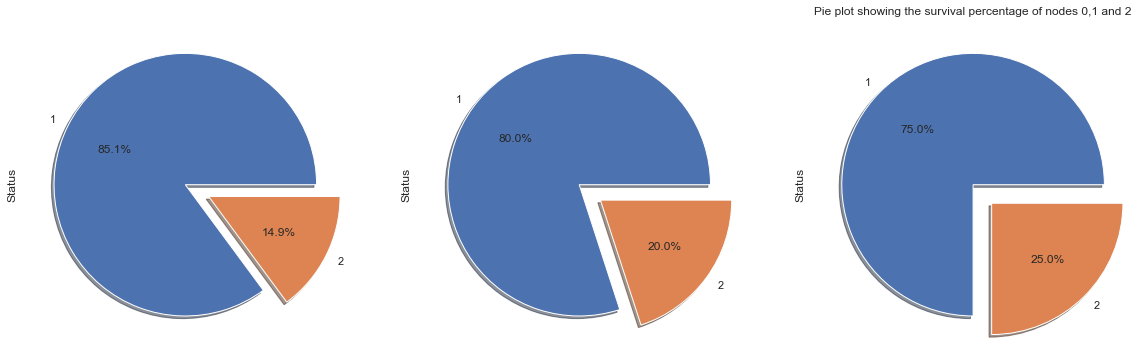

In [20]:
f,ax = plt.subplots(1,3,figsize=(20,7))
breastcancer_data['Status'][breastcancer_data['Pos_axillary_nodes'] == 0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
breastcancer_data['Status'][breastcancer_data['Pos_axillary_nodes'] == 1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
breastcancer_data['Status'][breastcancer_data['Pos_axillary_nodes'] == 2].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[2],shadow=True)
plt.title("Pie plot showing the survival percentage of nodes 0,1 and 2")

- **85% Patients** with **0** Pos_axillary_node survived 
- **80% Patients** with **1** Pos_axillary_node survived 
- **75% Patients** with **2** Pos_axillary_nodes survived 

<a id=section505></a>
## 5.5 Survival rate-Comparing Age and the Year of Operation

- Using a scatter plot to check the age of patients against the years of operation

Text(0.5, 1, 'Impact of Age and Year of operation on the survival status')

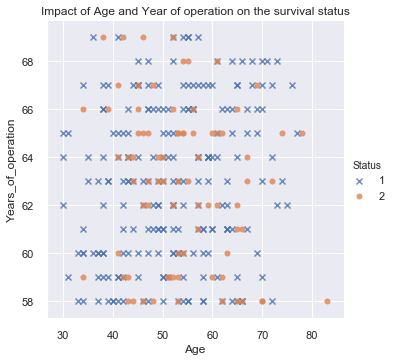

In [21]:
sns.lmplot(x='Age', y='Years_of_operation', hue='Status', markers=['x', 'o'],fit_reg=False, data=breastcancer_data)
plt.title("Impact of Age and Year of operation on the survival status")


- We could see that irrespective of the year of operation the patients from **Age 30** to **40** have a good survival rate
- More patients who did not survive fall in the Age range **45** to **65**
- Patient of Age above **80** did not survive five years or more


<a id=section506></a>
## 5.6 How is the survival rate considering the Age and the no.of Pos_axillary_nodes?

- Using a Facetgrid to check the relationship between Age and nodes with respect to survival rate

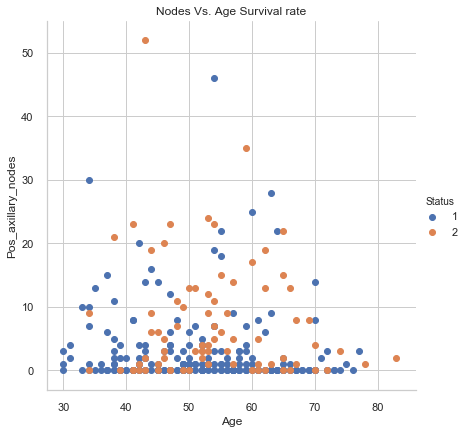

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(breastcancer_data, hue = "Status", height = 6).map(plt.scatter,"Age","Pos_axillary_nodes").add_legend()
plt.title("Nodes Vs. Age Survival rate")
plt.show()


- We could infer from the above plot that irrespective of Age when the no of nodes is **0** the survival rate is high
- When the Age is **30** to **40** the survival rate is high irrespective of the no of **nodes**
- There are less no of patients with **25** or more nodes
- The survival rate of patients with **Age** more than **50** and no of **nodes** more than **10** are less likely to survive

<a id=section507></a>
## 5.7 Does the survival rate change based on the Year of Operation and the Pos_axillary_nodes

Text(0.5, 1.0, 'Years_of_operation Vs Pos_axillary_nodes on survival status')

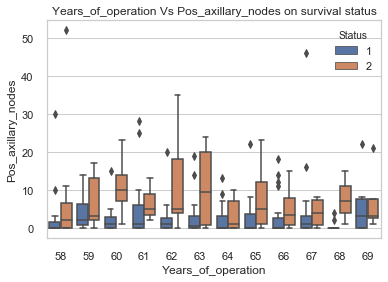

In [23]:
sns.boxplot(x="Years_of_operation", y="Pos_axillary_nodes", hue='Status', data=breastcancer_data)
plt.title("Years_of_operation Vs Pos_axillary_nodes on survival status")

- Irrespective of the year of operation the patients with **0** nodes are more likely to survive
- As the number of **nodes increase** the chances of **survival** decreases
- Year **63,62** and **60** saw more patients with increased **Pos_axillary_nodes**
- Year **68,69,61 and 60** saw all patients with **0** nodes survive


<a id=section508></a>
## 5.8  Draw pair plot to know the joint relationship between 'Age','Years Of Operation','Pos_axillary_nodes'.

Text(0.5, 1, 'Pair Plot to show the relationship')

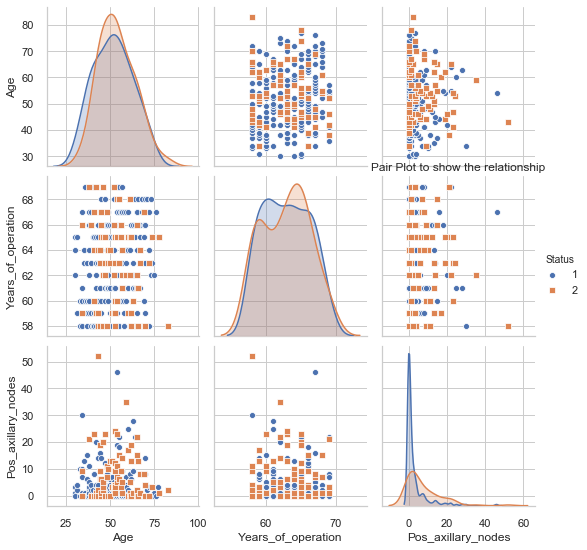

In [24]:
sns.pairplot(breastcancer_data[["Age","Years_of_operation","Pos_axillary_nodes","Status"]],vars = ["Age","Years_of_operation","Pos_axillary_nodes"],hue="Status", dropna=True,markers=["o", "s"])
plt.title('Pair Plot to show the relationship')

- More patients of **Age 50** died than **survived**
- Year of operation **60** saw more patients **survive**
- Patients with **0 Pos_axillary_nodes*** have high **survival** than the one with more **nodes**

Text(0.5, 1, 'Correlation between features')

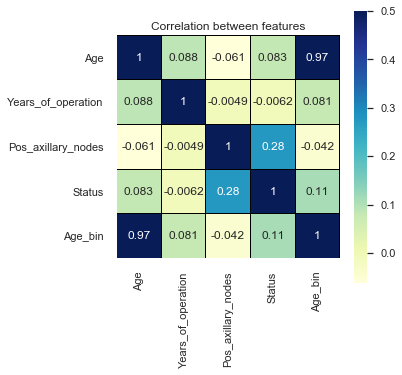

In [25]:
corr =breastcancer_data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=.5,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

- **Age** is positively correlated with **Status**
- **Pos_axillary_nodes** have a positive correlation with **Status**


<a id=section508></a>
### Hypothesis:Patients with 0 'Pos_axillary_nodes' are more likely to survive 5 years or more.
### Patients with Age '30 to 40' are more likely to survive 5 years or more

On studying Questionnaire 5.4, 5.6 and 5.7 we observed that an overwhelming no of patients with 0 Pos_axillary_nodes survived.
- __85%__ of __patients with 0 Pos_axillary_node__ survived.
- __80%__ of __patients with 1 Pos_axillary_node__ survived.
- __75%__ of __patients with 2 Pos_axillary_nodes__ survived.<br/>

- Irrespective of the **Year of operation** or the **Age** the patients with less **Pos_axillary_nodes** survived.As the no of **Pos_axillary_nodes** increased the survival chances got decreased

On studying questionnaire 5.5 and 5.6 we observed that majority of patients with Age 30 to 40 survived

- Almost all patients in Age bin **3.0** survived
- More than **90%** patients in **Age bin 4.0** survived

- Irrespective of the **Year of operation** or the **Pos_axillary_nodes** the patients of Age 30 to 40 survived.As the **Age** increased the survival chances got decreased


<a id=section6></a>
## 6.Conclusion

- The Breast Cancer Survival dataset contains cases from a study that was conducted between **1958 and 1970** at the **University of Chicago’s Billings Hospital** on the survival of patients who had undergone surgery for breast cancer.
- There were **306** cases recorded out of which **17** were duplicates and we were left with **289** cases
- Out of **289** cases **210** survived and **79** did not survive 5 years or longer
- Patient's **Age** is **positively correlated** with **status** i.e when Age increases the chances of survival is less
- Patient of **Age 30 to 40** have more survival rate than the patient of other ages
- More no of patients are operated in the year **58** and less no of patients got operated in **69**
- Rate of survival is high in the year **61,60 and 67** and is low in the year **65 and 69**
- **Year of operation** may not be an influenzing factor in the **survival** of patients
- When the **Pos_axillary_nodes** is **0** or **1** the chances of survival is very high
- **Pos_axillary_nodes** have a **positive** correlation with **status** i.e when the nodes increase the chance of survival is less
